In [5]:
#imports
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,BatchNormalization
from keras import regularizers

In [6]:
#making model
model=Sequential()
inputShape=(28,28,1)
#Conv2D did not accept(784,-1),(784,testcases) as an input shape
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=inputShape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(10,activation='linear',kernel_initializer='random_uniform'))
model.add(BatchNormalization())
model.add(Dense(10,activation='softmax',kernel_initializer='random_uniform'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

Train on 21001 samples, validate on 21000 samples
Epoch 1/4
21001/21001 [==============================] - 18s 846us/step - loss: 0.0057 - acc: 0.9986 - val_loss: 0.0039 - val_acc: 0.9992
Epoch 2/4
21001/21001 [==============================] - 19s 893us/step - loss: 0.0024 - acc: 0.9996 - val_loss: 0.0028 - val_acc: 0.9995
Epoch 3/4
21001/21001 [==============================] - 21s 1ms/step - loss: 0.0018 - acc: 0.9998 - val_loss: 0.0031 - val_acc: 0.9993
Epoch 4/4
21001/21001 [==============================] - 21s 982us/step - loss: 0.0011 - acc: 0.9999 - val_loss: 0.0031 - val_acc: 0.9994
Train on 21000 samples, validate on 21001 samples
Epoch 1/6
21000/21000 [==============================] - 23s 1ms/step - loss: 0.0034 - acc: 0.9991 - val_loss: 0.0041 - val_acc: 0.9986
Epoch 2/6
21000/21000 [==============================] - 26s 1ms/step - loss: 0.0016 - acc: 0.9999 - val_loss: 0.0012 - val_acc: 0.9998
Epoch 3/6
21000/21000 [==============================] - 23s 1ms/step - loss: 

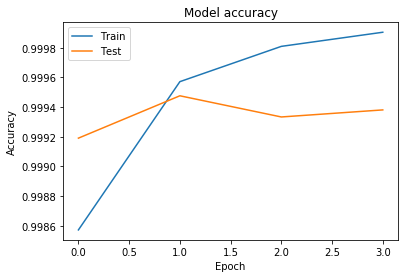

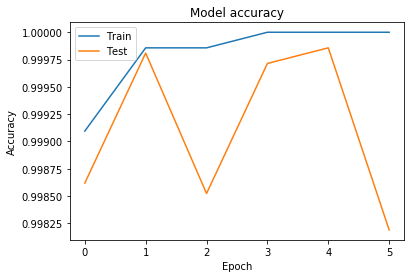

In [11]:
#making dataloader,
# this was mainly to convert pandas dataframe to numpy array
# keras inbuilt functionality and reshape functionality are
# available for numpy.

import pandas as pd
def MnistLoadData(X,Y,frac):
    lenx=len(X)
    lenY=len(Y)
    #splitting input data to test and train
    x1=X.loc[0:lenx*frac]
    x2=X.loc[lenx*(1-frac):lenx]
    y1=Y.loc[0:lenY*frac]
    y2=Y.loc[lenY*(1-frac):lenY]
    #converting pandas datafram to numpy
    #for performing reshape and using 
    #to_categorical functions of keras
    x1=x1.to_numpy()
    x2=x2.to_numpy()
    y1=y1.to_numpy()
    y2=y2.to_numpy()
    x1=x1.reshape(x1.shape[0],28,28,1)
    x2=x2.reshape(x2.shape[0],28,28,1)
    #one hot encoding functionality of keras
    #converts y to its corresponding probablity array
    #1=[1,0,0,0,0,0,0,0...]
    #2=[0,1,0,0,0,0,0,....]
    y1=keras.utils.to_categorical(y1,10)
    y2=keras.utils.to_categorical(y2,10)
    return (x1,y1),(x2,y2)

#reading dataset
dataset=pd.read_csv('dataset/digit-recognizer/train.csv')
X=dataset.drop('label',axis=1)
Y=dataset['label']

#loading data
(x1,y1),(x2,y2)=MnistLoadData(X,Y,.5)
#making model, here neural net extracts characteristic weights for this dataset
#so that it can make predictions
history1=model.fit(x1,y1,batch_size=128,epochs=4,validation_data=(x2,y2))#epoch is set at 9 because that is where inflection happens in acc
history2=model.fit(x2,y2,batch_size=128,epochs=6,validation_data=(x1,y1))

import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [12]:
#check using the second half of the dataset, how accurate the prediction is
acc=model.evaluate(x2,y2,verbose=1)
print(acc)
#loading data from csv for predictions
#xtest need not be seperated since it only has input vector
Xtest=pd.read_csv('dataset/digit-recognizer/test.csv')
Xtest=Xtest.to_numpy()
Xtest=Xtest.reshape(Xtest.shape[0],28,28,1)
Ytest=model.predict(Xtest)

21000/21000 [==============================] - 4s 204us/step
[0.001553987694376528, 0.9999047619047619]


In [13]:
#making the submission file
from numpy import argmax
import numpy as np
Yarray=[]
i=1
Yarray.append(("ImageId","Label"))
for nu in Ytest:
    Yarray.append((i,int(argmax(nu))))
    i=i+1

np.savetxt("dataset/digit-recognizer/submission.csv",np.asarray(Yarray),delimiter=",",fmt="%s")